![](img/330-banner.png)

# Lecture 3: Machine Learning Fundamentals 

UBC 2022-23

Instructor: Varada Kolhatkar

## Imports, Announcements, LOs

### Imports

In [1]:
# import the libraries
import os
import sys

import graphviz
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
from sklearn.model_selection import train_test_split

sys.path.append("code/.")
from plotting_functions import *

# Classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from utils import *

%matplotlib inline

pd.set_option("display.max_colwidth", 200)

<br><br>

### Announcements

- hw2 released. (Due next week Tuesday at 11:59pm.)
    - You are welcome to broadly discuss it with your classmates but final answers and submissions must be your own. 
    - Group submissions are not allowed for this assignment. 
    - Usually the deadlines will be on Mondays but I've changed it to Tuesday next week because Monday is [declared as a National day of mourning in honour of Queen Elizabeth II](https://broadcastemail.ubc.ca/2022/09/13/national-day-of-mourning-in-honour-of-queen-elizabeth-ii-on-september-19/). 
- Advice on keeping up with the material 
    - Practice! 
    - Make sure you run the lecture notebooks on your laptop. 
    - Start early on homework assignments.     
- If you are still on the waitlist, it's your responsibility to keep up with the material and submit assignments. 
- Last day to withdraw without a W standing: Sept 19, 2022

<br><br>

### Learning outcomes

From this lecture, you will be able to 

- explain how decision boundaries change with the `max_depth` hyperparameter;
- explain the concept of generalization;
- appropriately split a dataset into train and test sets using `train_test_split` function;
- explain the difference between train, validation, test, and "deployment" data;
- identify the difference between training error, validation error, and test error;
- explain cross-validation and use `cross_val_score` and `cross_validate` to calculate cross-validation error;
- recognize overfitting and/or underfitting by looking at train and test scores;
- explain why it is generally not possible to get a perfect test score (zero test error) on a supervised learning problem;
- describe the fundamental tradeoff between training score and the train-test gap;
- state the golden rule;
- start to build a standard recipe for supervised learning: train/test split, hyperparameter tuning with cross-validation, test on test set.

<br><br><br><br>

## Generalization [[video](https://youtu.be/iS2hsRRlc2M)]

### Big picture and motivation 

In machine learning we want to learn a mapping function from labeled data so that we can predict labels of **unlabeled** data. For example, suppose we want to build a spam filtering system.  We will take a large number of spam/non-spam messages from the past, learn patterns associated with spam/non-spam from them, and predict whether **a new incoming message** in someone's inbox is spam or non-spam based on these patterns. 

So we want to learn from the past but ultimately we want to apply it on the future email messages. 

![](img/eva-think.png)

**How can we generalize from what we've seen to what we haven't seen?** 

In this lecture, we'll see how machine learning tackles this question. 

### Model complexity and training error

In the last lecture, we looked at decision boundaries, a way to visualize what sort of examples will be classified as positive and negative. 

Let's examine how does the decision boundary change for different tree depths. 

In [2]:
# Toy quiz2 grade data
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df.head(10)

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+
5,1,0,70,73,68,74,71,not A+
6,1,0,80,88,89,88,91,A+
7,0,1,95,93,69,79,75,not A+
8,0,0,97,90,94,99,80,not A+
9,1,1,95,95,94,94,85,not A+


In [3]:
X = classification_df.drop(["quiz2"], axis=1)
y = classification_df["quiz2"]

In [4]:
X_subset = X[["lab4", "quiz1"]]  # Let's consider a subset of the data for visualization
X_subset.head()

,lab4,quiz1
0,91,92
1,83,91
2,80,80
3,91,89
4,92,85


In the following model, this decision boundary is created by asking one question. 

Error:   0.286


/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


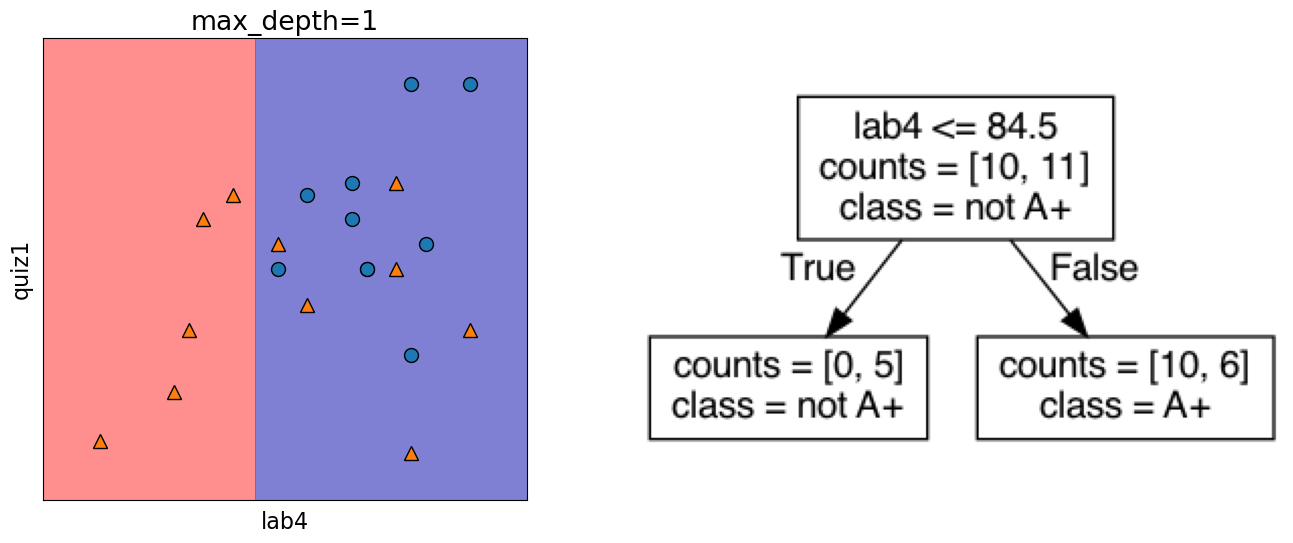

In [5]:
depth = 1
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset, y)
model.score(X_subset, y)
print("Error:   %0.3f" % (1 - model.score(X_subset, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

In the following model, this decision boundary is created by asking two questions. 

Error:   0.190


/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


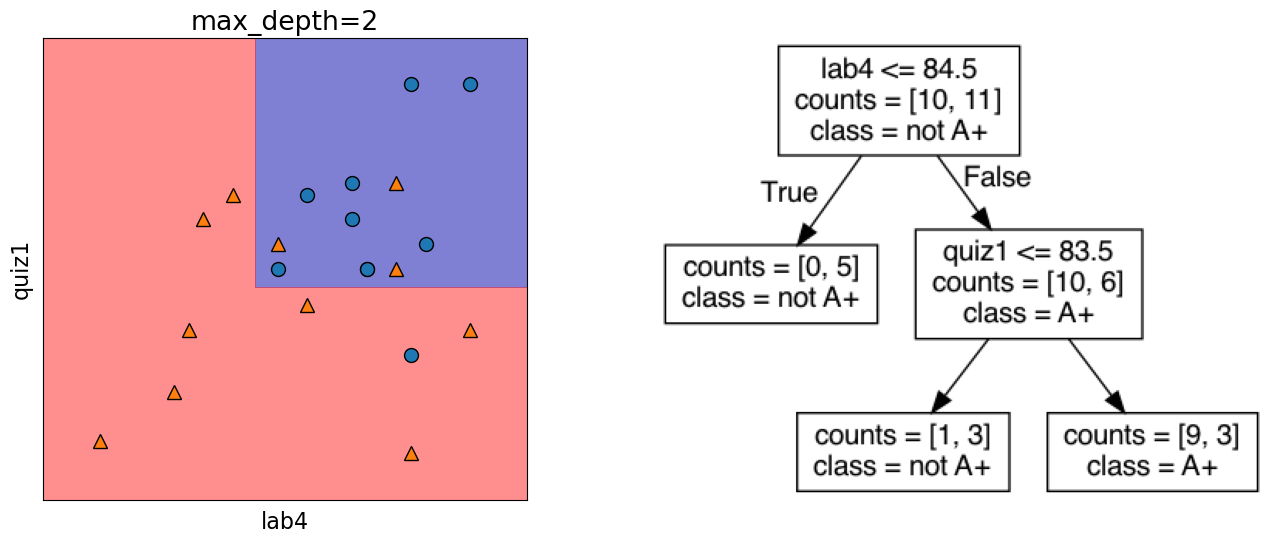

In [6]:
depth = 2
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset, y)
model.score(X_subset, y)
print("Error:   %0.3f" % (1 - model.score(X_subset, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

Let's look at the decision boundary with depth = 4. 

Error:   0.048


/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


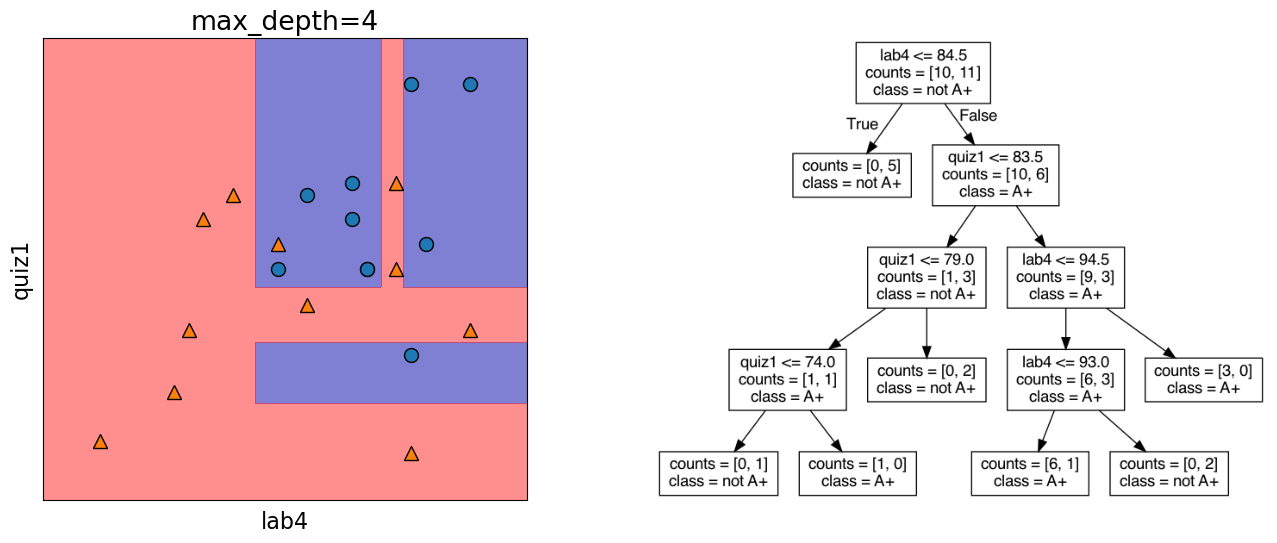

In [7]:
depth = 4
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset, y)
model.score(X_subset, y)
print("Error:   %0.3f" % (1 - model.score(X_subset, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

Let's look at the decision boundary with depth = 6. 

Error:   0.000


/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


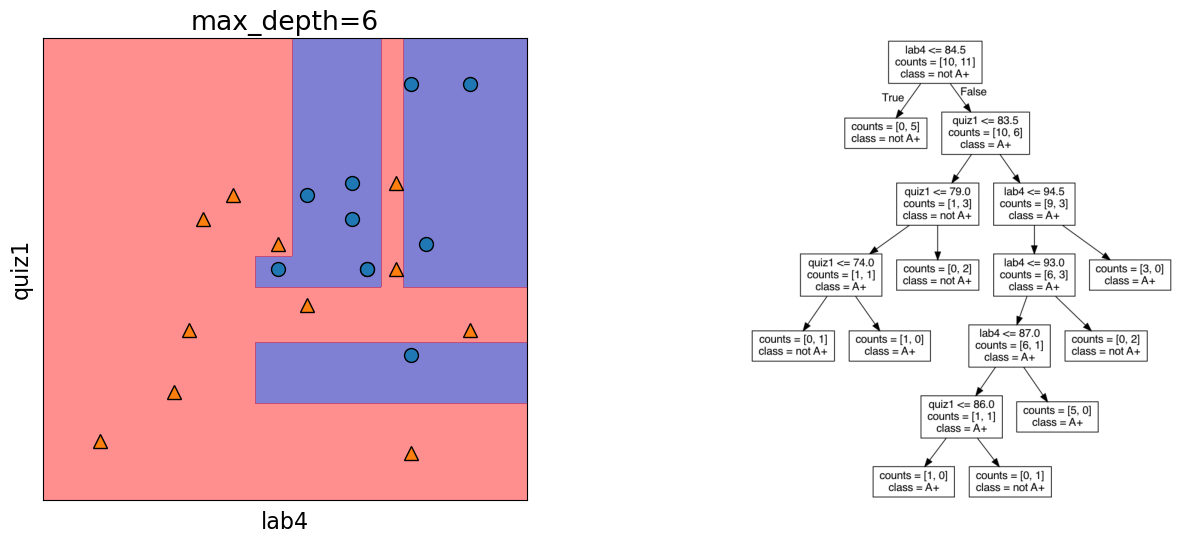

In [8]:
depth = 6
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset, y)
model.score(X_subset, y)
print("Error:   %0.3f" % (1 - model.score(X_subset, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

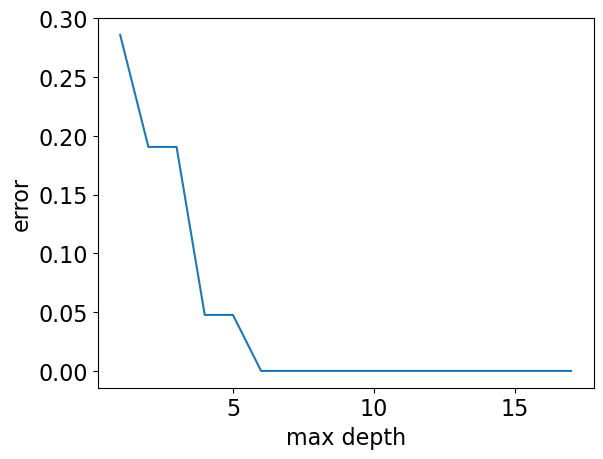

In [9]:
max_depths = np.arange(1, 18)
errors = []
for max_depth in max_depths:
    error = 1 - DecisionTreeClassifier(max_depth=max_depth).fit(X_subset, y).score(
        X_subset, y
    )
    errors.append(error)
plt.plot(max_depths, errors)
plt.xlabel("max depth")
plt.ylabel("error");

- Our model has 0% error for depths >= 6!! 
- But it's also becoming more and more specific and sensitive to the training data.  
- Is it good or bad?

```{admonition} Note 
:class: note
Although the plot above (complexity hyperparameter vs error) is more popular, we could also look at the same plot flip the $y$-axis, i.e., consider accuracy instead of error. 
```

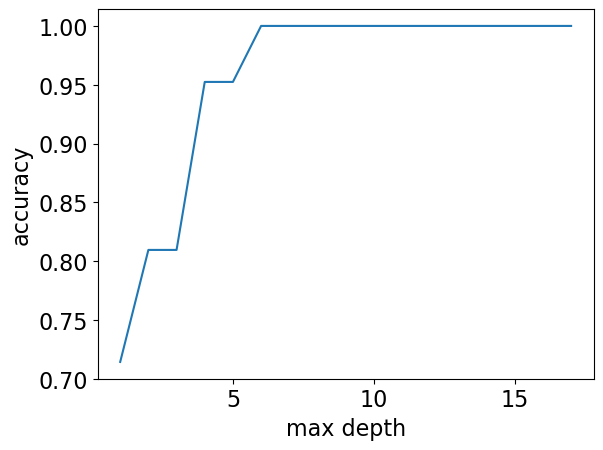

In [10]:
max_depths = np.arange(1, 18)
accuracies = []
for max_depth in max_depths:
    accuracy = (
        DecisionTreeClassifier(max_depth=max_depth).fit(X_subset, y).score(X_subset, y)
    )
    accuracies.append(accuracy)
plt.plot(max_depths, accuracies)
plt.xlabel("max depth")
plt.ylabel("accuracy");

### 🤔 Eva's questions

![](img/eva-think.png)


At this point Eva is wondering about the following questions. 

- How to pick the best depth? 
- How can we make sure that the model we have built would do reasonably well on new data in the wild when it's deployed? 
- Which of the following rules learned by the decision tree algorithm are likely to generalize better to new data? 

> Rule 1: If class_attendance == 1 then grade is A+. 

> Rule 2: If lab3 > 83.5 and quiz1 <= 83.5 and lab2 <= 88 then quiz2 grade is A+

To better understand the material in the next sections, think about these questions on your own or discuss them with your friend/neighbour before proceeding. 

<br><br><br><br>

### Generalization: Fundamental goal of ML

> **To generalize beyond what we see in the training examples**

We only have access to limited amount of training data and we want to learn a mapping function which would predict targets reasonably well for examples beyond this training data. 

- Example: Imagine that a learner sees the following images and corresponding labels. 

![](img/generalization-train.png)
<!-- <center>
<img src='img/generalization-train.png' width="600" height="600" />
</center>     -->

### Generalizing to unseen data

- Now the learner is presented with new images (1 to 4) for prediction. 
- What prediction would you expect for each image?   

![](img/generalization-predict.png)

<!-- <center>
<img src='img/generalization-predict.png' width="1000" height="1000" />
</center>     -->

- Goal: We want the learner to be able to generalize beyond what it has seen in the training data.
- But these new examples should be representative of the training data. That is they should have the same characteristics as the training data. 
- In this example, we would like the leaner to be able to predict labels for test examples 1, 2, and 3 accurately. Although 2, 3 don't exactly occur in the training data, they are very much similar to the images in the training data. That said, is it fair to expect the learner to label image 4 correctly? 

### Training error vs. Generalization error 

- Given a model $M$, in ML, people usually talk about two kinds of errors of $M$. 
    1. Error on the training data: $error_{training}(M)$ 
    2. Error on the entire distribution $D$ of data: $error_{D}(M)$
- We are interested in the error on the entire distribution     
    - ... But we do not have access to the entire distribution 😞

<br><br><br><br>

## Data Splitting [[video](https://youtu.be/h2AEobwcUQw)]

### How to approximate generalization error? 

A common way is **data splitting**. 
- Keep aside some randomly selected portion from the training data.
- `fit` (train) a model on the training portion only. 
- `score` (assess) the trained model on this set aside data to get a sense of how well the model would be able to generalize.
- Pretend that the kept aside data is representative of the real distribution $D$ of data. 

![](img/eva-good-idea.png)

In [11]:
# scikit-learn train_test_split
url = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"
HTML("<iframe src=%s width=1000 height=800></iframe>" % url)

/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


- We can pass `X` and `y` or a dataframe with both `X` and `y` in it. 
- We can also specify the train or test split sizes. 

### Simple train/test split 

- The picture shows an 80%-20% split of a toy dataset with 10 examples. 
- The data is shuffled before splitting. 
- Usually when we do machine learning we split the data before doing anything and put the test data in an imaginary chest lock. 

![](img/train-test-split.png)

<!-- <img src='img/train-test-split.png' width="1500" height="1500" /> -->

In [12]:
# Let's demonstrate this with the canada usa cities data
# The data is available in the data directory
df = pd.read_csv("data/canada_usa_cities.csv")
X = df.drop(columns=["country"])
y = df["country"]

In [13]:
X

,longitude,latitude
0,-130.0437,55.9773
1,-134.4197,58.3019
2,-123.0780,48.9854
3,-122.7436,48.9881
4,-122.2691,48.9951
...,...,...
204,-72.7218,45.3990
205,-66.6458,45.9664
206,-79.2506,42.9931
207,-72.9406,45.6275


In [14]:
y

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
204    Canada
205    Canada
206    Canada
207    Canada
208    Canada
Name: country, Length: 209, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)  # 80%-20% train test split on X and y

# Print shapes
shape_dict = {
    "Data portion": ["X", "y", "X_train", "y_train", "X_test", "y_test"],
    "Shape": [
        X.shape,
        y.shape,
        X_train.shape,
        y_train.shape,
        X_test.shape,
        y_test.shape,
    ],
}

shape_df = pd.DataFrame(shape_dict)
HTML(shape_df.to_html(index=False))

Data portion,Shape
X,"(209, 2)"
y,"(209,)"
X_train,"(167, 2)"
y_train,"(167,)"
X_test,"(42, 2)"
y_test,"(42,)"


#### Creating `train_df` and `test_df`

- Sometimes we want to keep the target in the train split for EDA or for visualization. 

In [16]:
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=123
)  # 80%-20% train test split on df
X_train, y_train = train_df.drop(columns=["country"]), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"]), test_df["country"]
train_df.head()

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada


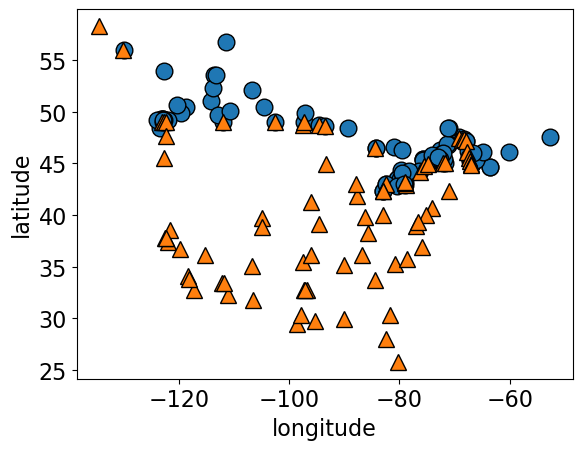

In [17]:
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y, s=12)
plt.xlabel("longitude")
plt.ylabel("latitude");

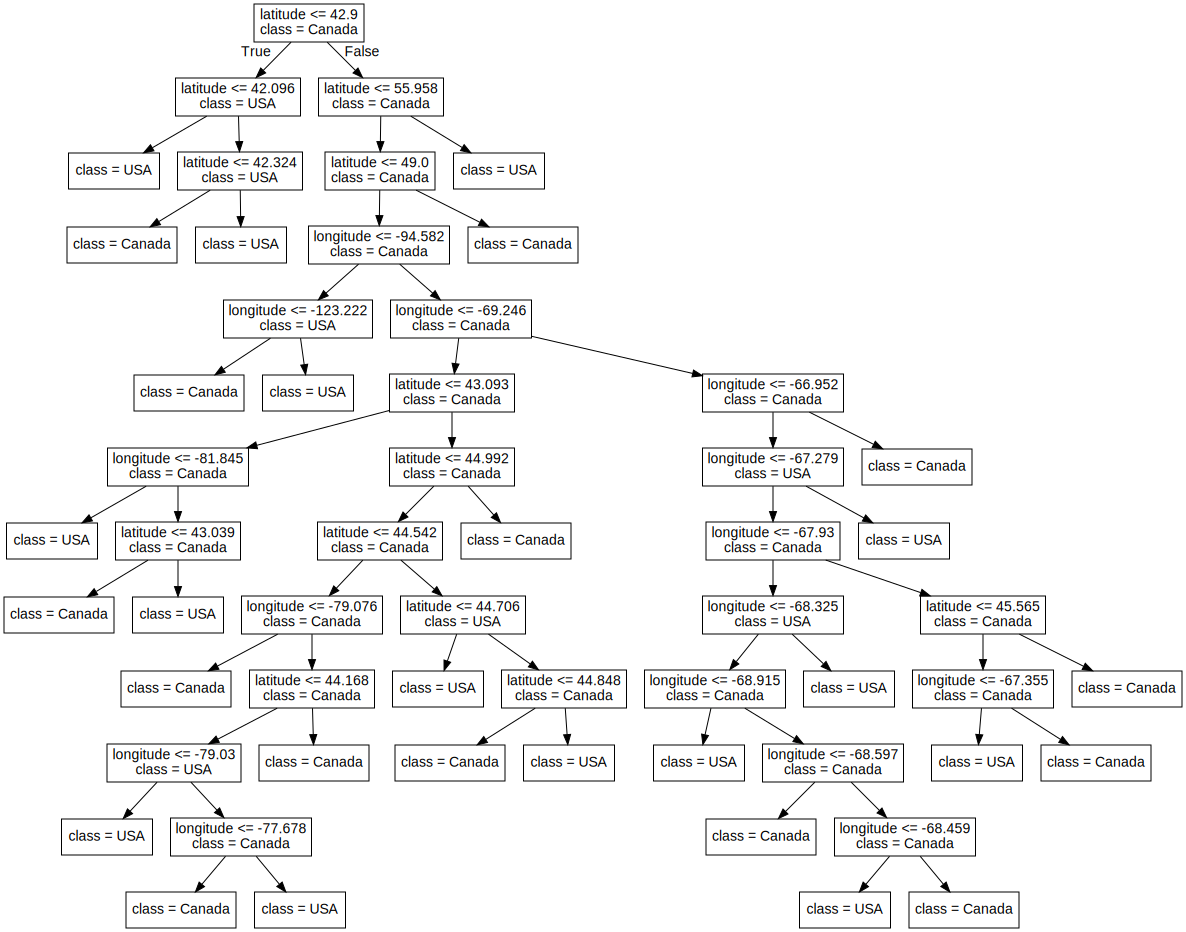

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
display_tree(X_train.columns, model)

Let's examine the train and test accuracies with the split now.

In [19]:
print("Train accuracy:   %0.3f" % model.score(X_train, y_train))
print("Test accuracy:   %0.3f" % model.score(X_test, y_test))

Train accuracy:   1.000
Test accuracy:   0.738


/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


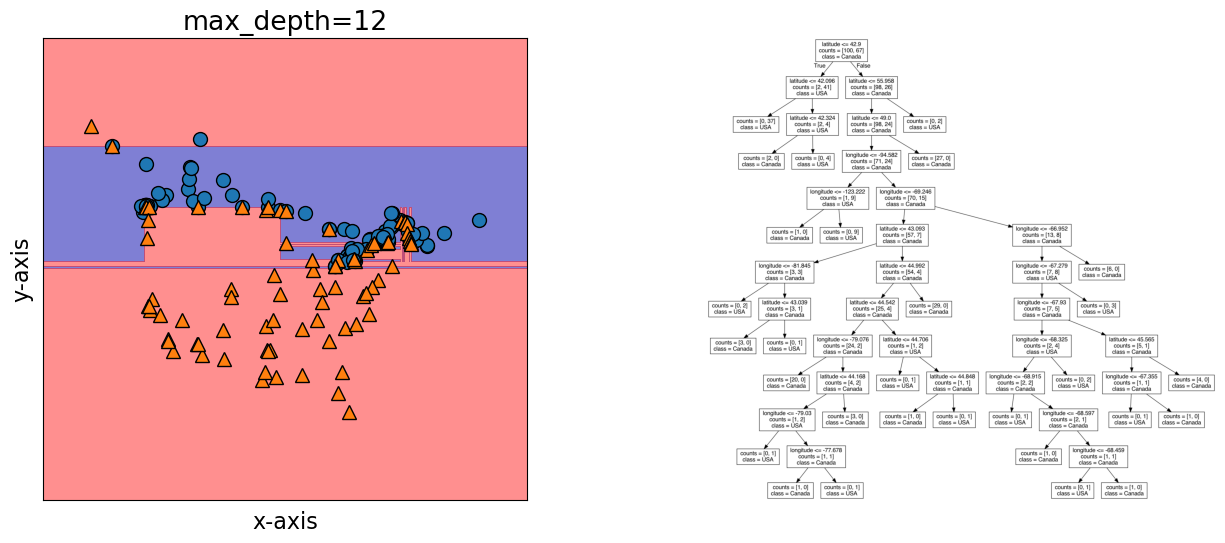

In [20]:
plot_tree_decision_boundary_and_tree(model, X, y, height=6, width=16, eps=10)

/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


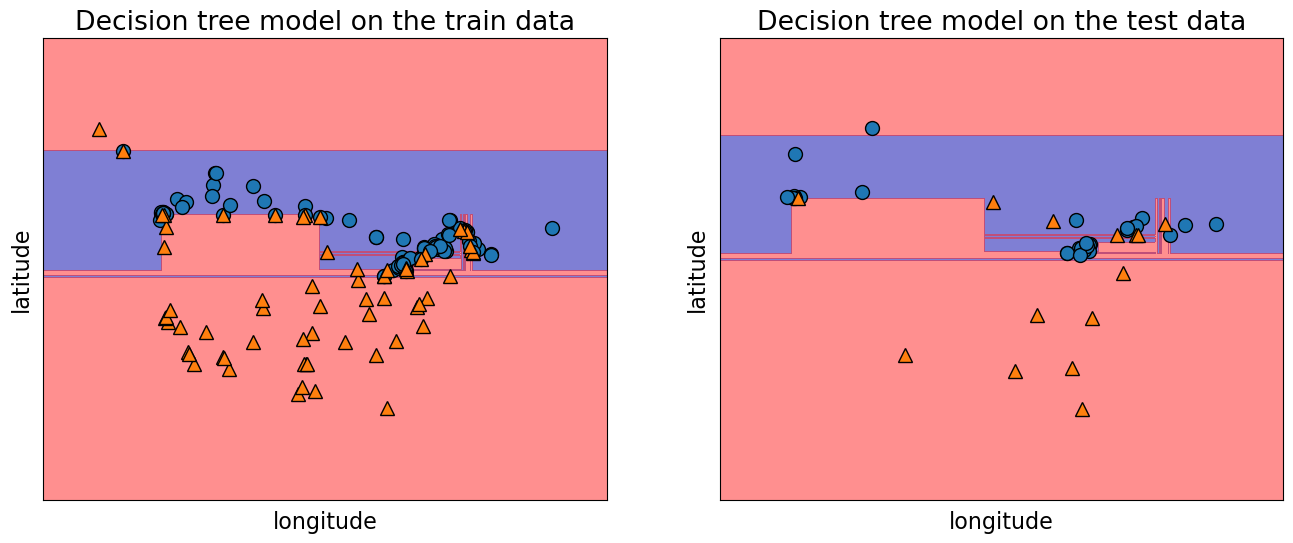

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={"xticks": (), "yticks": ()})
plot_tree_decision_boundary(
    model,
    X_train,
    y_train,
    eps=10,
    x_label="longitude",
    y_label="latitude",
    ax=ax[0],
    title="Decision tree model on the train data",
)
plot_tree_decision_boundary(
    model,
    X_test,
    y_test,
    eps=10,
    x_label="longitude",
    y_label="latitude",
    ax=ax[1],
    title="Decision tree model on the test data",
)

- Useful arguments of `train_test_split`: 
    - `test_size`
    - `train_size` 
    - `random_state`

#### `test_size`, `train_size` arguments

- Let's us specify how we want to split the data. 
- We can specify either of the two. See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- There is no hard and fast rule on what split sizes should we use. 
    - It depends upon how much data is available to you. 
- Some common splits are 90/10, 80/20, 70/30 (training/test).
- In the above example, we used 80/20 split. 

#### `random_state` argument

- The data is shuffled before splitting which is crucial step. (You will explore this in the lab.) 
- The `random_state` argument controls this shuffling. 
- In the example above we used `random_state=123`. If you run this notebook with the same `random_state` it should give you exactly the same split. 
    - Useful when you want reproducible results. 

### Train/validation/test split

- Some of you may have heard of "validation" data.
- Sometimes it's a good idea to have a separate data for hyperparameter tuning. 

![](img/train-valid-test-split.png)

<!-- <img src='img/train-valid-test-split.png' width="1500" height="1500" /> -->

- We will try to use "validation" to refer to data where we have access to the target values.
  - But, unlike the training data, we only use this for hyperparameter tuning and model assessment; we don't pass these into `fit`.  
- We will try to use "test" to refer to data where we have access to the target values 
  - But, unlike training and validation data, we neither use it in training nor hyperparameter optimization. 
  - We only use it **once** to evaluate the performance of the best performing model on the validation set.   
  - We lock it in a "vault" until we're ready to evaluate. 

Note that there isn't good concensus on the terminology of what is validation and what is test. 

```{admonition} Note 
:class: note
Validation data is also referred to as **development data** or **dev set** for short.  
```

### "Deployment" data

- After we build and finalize a model, we deploy it, and then the model deals with the data in the wild. 
- We will use "deployment" to refer to this data, where we do **not** have access to the target values.
- Deployment error is what we _really_ care about.
- We use validation and test errors as proxies for deployment error, and we hope they are similar.
- So, if our model does well on the validation and test data, we hope it will do well on deployment data.

### Summary of train, validation, test, and deployment data

|         | `fit` | `score` | `predict` |
|----------|-------|---------|-----------|
| Train    | ✔️      | ✔️      | ✔️         |
| Validation |      | ✔️      | ✔️         |
| Test    |       |  once   | once         |
| Deployment    |       |       | ✔️         |

You can typically expect $E_{train} < E_{validation} < E_{test} < E_{deployment}$.

## ❓❓ Questions on generalization and data splitting

### iClicker Exercise 3.1 

**iClicker cloud join link: https://join.iclicker.com/3DP5H**

**Select all of the following statements which are TRUE.**

- (A) A decision tree model with no depth is likely to perform very well on the deployment data. 
- (B) Data splitting helps us assess how well our model would generalize. 
- (C) Deployment data is used at the very end and only scored once.  
- (D) Validation data could be used for hyperparameter optimization. 
- (E) It's recommended that data be shuffled before splitting it into `train` and `test` sets.


<br><br><br><br>

## Cross-validation [[video](https://youtu.be/4cv8VYonepA)]

### Problems with single train/validation split

- Only using a portion of your data for training and only a portion for validation.
- If your dataset is small you might end up with a tiny training and/or validation set.
- You might be unlucky with your splits such that they don't align well or don't well represent your test data.

![](img/train-valid-test-split.png)

<!-- <img src='img/train-valid-test-split.png' width="1500" height="1500" /> -->

### Cross-validation to the rescue!! 

- Cross-validation provides a solution to this problem. 
- Split the data into $k$ folds ($k>2$, often $k=10$). In the picture below $k=4$.
- Each "fold" gets a turn at being the validation set.
- Note that cross-validation doesn't shuffle the data; it's done in `train_test_split`.

![](img/cross-validation.png)
<!-- <img src='img/cross-validation.png' width="1500"> -->

- Each fold gives a score and we usually average our $k$ results. 
- It's better to examine the variation in the scores across folds.  
- Gives a more **robust** measure of error on unseen data.

### Cross-validation using `scikit-learn`

In [22]:
from sklearn.model_selection import cross_val_score, cross_validate

#### `cross_val_score`

In [23]:
model = DecisionTreeClassifier(max_depth=4)
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([0.76470588, 0.82352941, 0.70588235, 0.94117647, 0.82352941,
       0.82352941, 0.70588235, 0.9375    , 0.9375    , 0.9375    ])

In [24]:
print(f"Average cross-validation score = {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.2f}")

Average cross-validation score = 0.84
Standard deviation of cross-validation score = 0.09


Under the hood

- It creates `cv` folds on the data.
- In each fold, it fits the model on the training portion and scores on the validation portion. 
- The output is a list of validation scores in each fold.

#### `cross_validate`

- Similar to `cross_val_score` but more powerful.
- Gives us access to training and validation scores.  

In [25]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.001428,0.000457,0.764706,0.913333
1,0.000593,0.000355,0.823529,0.906667
2,0.000552,0.000343,0.705882,0.906667
3,0.000532,0.000337,0.941176,0.900000
4,0.000568,0.000424,0.823529,0.906667
5,0.000602,0.000415,0.823529,0.913333
6,0.000558,0.000338,0.705882,0.920000
7,0.000560,0.000417,0.937500,0.900662
8,0.000676,0.000357,0.937500,0.900662
9,0.000543,0.000341,0.937500,0.900662


In [26]:
pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,0.000661
score_time,0.000378
test_score,0.840074
train_score,0.906865


```{important}
Keep in mind that cross-validation does not return a model. It is not a way to build a model that can be applied to new data. The purpose of cross-validation is to **evaluate** how well the model will generalize to unseen data. 
```

```{seealso}
Note that both `cross_val_score` and `cross_validate` functions do not shuffle the data. Check out [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), where proportions of classes is the same in each fold as they are in the whole dataset. By default, `sklearn` uses `StratifiedKFold` when carrying out cross-validation for classification problems. 
```

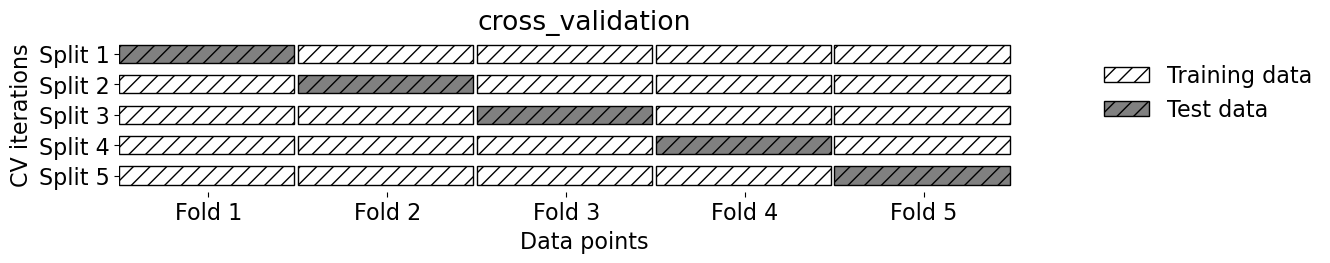

In [27]:
mglearn.plots.plot_cross_validation()

#### Our typical supervised learning set up is as follows: 

- We are given training data with features `X` and target `y`
- We split the data into train and test portions: `X_train, y_train, X_test, y_test`
- We carry out hyperparameter optimization using cross-validation on the train portion: `X_train` and `y_train`. 
- We assess our best performing model on the test portion: `X_test` and `y_test`.  
- What we care about is the **test error**, which tells us how well our model can be generalized.
- If this test error is "reasonable" we deploy the model which will be used on new unseen examples.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = DecisionTreeClassifier(max_depth=10)
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.001014,0.000420,0.875000,1.000000
1,0.000579,0.000346,0.875000,0.992857
2,0.000547,0.000340,0.875000,1.000000
3,0.000543,0.000335,0.687500,1.000000
4,0.000699,0.000371,0.812500,1.000000
5,0.000536,0.000337,0.812500,1.000000
6,0.000527,0.000334,0.866667,0.985816
7,0.000617,0.000354,0.600000,0.992908
8,0.000562,0.000340,0.666667,1.000000
9,0.000534,0.000336,0.733333,1.000000


In [29]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [30]:
results = {}
results["Decision tree"] = mean_std_cross_val_scores(
    model, X_train, y_train, return_train_score=True
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Decision tree,0.001 (+/- 0.000),0.000 (+/- 0.000),0.775 (+/- 0.047),0.994 (+/- 0.014)


- How do we know whether this test score is reasonable? 

```{admonition} Exercise 3.3: Cross-validation

```

## Break (5 min)

![](img/eva-coffee.png)


## Underfitting, overfitting, the fundamental trade-off, the golden rule [[video](https://youtu.be/Ihay8yE5KTI)]

### Types of errors

Imagine that your train and validation errors do not align with each other. How do you diagnose the problem?  

We're going to think about 4 types of errors:

- $E_\textrm{train}$ is your training error (or mean train error from cross-validation).
- $E_\textrm{valid}$ is your validation error (or mean validation error from cross-validation).
- $E_\textrm{test}$ is your test error.
- $E_\textrm{best}$ is the best possible error you could get for a given problem.

### Underfitting 

In [31]:
model = DecisionTreeClassifier(max_depth=1)  # decision stump
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train error:   %0.3f" % (1 - np.mean(scores["train_score"])))
print("Validation error:   %0.3f" % (1 - np.mean(scores["test_score"])))

Train error:   0.188
Validation error:   0.212


- If your model is too simple, like `DummyClassifier` or `DecisionTreeClassifier` with `max_depth=1`, it's not going to pick up on some random quirks in the data but it won't even capture useful patterns in the training data.
- The model won't be very good in general. Both train and validation errors would be high. This is **underfitting**.
- The gap between train and validation error is going to be lower.
- $E_\textrm{best} \lt E_\textrm{train} \lesssim E_\textrm{valid}$

### Overfitting 

In [32]:
model = DecisionTreeClassifier(max_depth=None)
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train error:   %0.3f" % (1 - np.mean(scores["train_score"])))
print("Validation error:   %0.3f" % (1 - np.mean(scores["test_score"])))

Train error:   0.000
Validation error:   0.220


- If your model is very complex, like a `DecisionTreeClassifier(max_depth=None)`, then you will learn unreliable patterns in order to get every single training example correct.
- The training error is going to be very low but there will be a big gap between the training error and the validation error. This is **overfitting**.
- In overfitting scenario, usually we'll see: 
$E_\textrm{train} \lt E_\textrm{best}  \lt E_\textrm{valid}$
- In general, if $E_\textrm{train}$ is low, we are likely to be in the overfitting scenario. It is fairly common to have at least a bit of this.

- So the validation error does not necessarily decrease with the training error. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
results_dict = {
    "depth": [],
    "mean_train_error": [],
    "mean_cv_error": [],
    "std_cv_error": [],
    "std_train_error": [],
}
param_grid = {"max_depth": np.arange(1, 16)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_error"].append(1 - np.mean(scores["test_score"]))
    results_dict["mean_train_error"].append(1 - np.mean(scores["train_score"]))
    results_dict["std_cv_error"].append(scores["test_score"].std())
    results_dict["std_train_error"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")

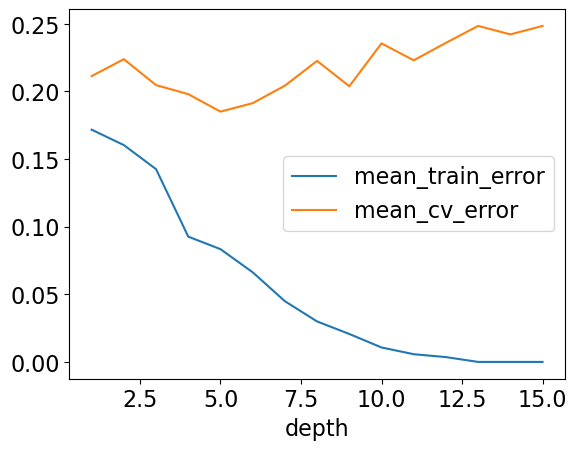

In [34]:
results_df[["mean_train_error", "mean_cv_error"]].plot();

- Here, for larger depths we observe that the training error is close to 0 but validation error goes up and down. 
- As we make more complex models we start encoding random quirks in the data, which are not grounded in reality.  
- These random quirks do not generalize well to new data. 
- This problem of failing to be able to generalize to the validation data or test data is called **overfitting**.

### The "fundamental tradeoff" of supervised learning:


**As you increase model complexity, $E_\textrm{train}$ tends to go down but $E_\textrm{valid}-E_\textrm{train}$ tends to go up.**


### Bias vs variance tradeoff 

- The fundamental trade-off is also called the bias/variance tradeoff in supervised machine learning.

**Bias**
: the tendency to consistently learn the same wrong thing (high bias corresponds to underfitting)

**Variance** 
: the tendency to learn random things irrespective of the real signal (high variance corresponds to overfitting)

```{seealso} 
Check out [this article by Pedro Domingos](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) for some approachable explanation on machine learning fundamentals and bias-variance tradeoff. 
```

### How to pick a model that would generalize better?

- We want to avoid both underfitting and overfitting. 
- We want to be consistent with the training data but we don't to rely too much on it. 

<!-- <center>
<img src='img/malp_0201.png' width="800" height="800" />
</center>    
 -->
![](img/malp_0201.png)

[source](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch02.html#relation-of-model-complexity-to-dataset-size)

- There are many subtleties here and there is no perfect answer but a  common practice is to pick the model with minimum cross-validation error. 

In [35]:
def cross_validate_std(*args, **kwargs):
    """Like cross_validate, except also gives the standard deviation of the score"""
    res = pd.DataFrame(cross_validate(*args, **kwargs))
    res_mean = res.mean()
    res_mean["std_test_score"] = res["test_score"].std()
    if "train_score" in res:
        res_mean["std_train_score"] = res["train_score"].std()
    return res_mean

In [36]:
results_df

,mean_train_error,mean_cv_error,std_cv_error,std_train_error
depth,,,,
1,0.171657,0.211250,0.048378,0.006805
2,0.160258,0.223750,0.062723,0.007316
3,0.142467,0.204583,0.053763,0.022848
4,0.092604,0.197917,0.056955,0.006531
5,0.083338,0.185000,0.064205,0.010650
6,0.066251,0.191250,0.072707,0.012019
7,0.044873,0.204167,0.088329,0.009059
8,0.029909,0.222500,0.092669,0.009422
9,0.020653,0.203750,0.091524,0.010294


### test score vs. cross-validation score

In [37]:
best_depth = results_df.index.values[np.argmin(results_df["mean_cv_error"])]
print(
    "The minimum validation error is %0.3f at max_depth = %d "
    % (
        np.min(results_df["mean_cv_error"]),
        best_depth,
    )
)

The minimum validation error is 0.185 at max_depth = 5 


- Let's pick `max_depth`= 5 and try this model on the test set. 

In [38]:
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)
print(f"Error on test set: {1 - model.score(X_test, y_test):.2f}")

Error on test set: 0.19


- The test error is comparable with the cross-validation error. 
- Do we feel confident that this model would give similar performace when deployed? 

### The golden rule <a name="4"></a>

- Even though we care the most about test error **THE TEST DATA CANNOT INFLUENCE THE TRAINING PHASE IN ANY WAY**. 
- We have to be very careful not to violate it while developing our ML pipeline. 
- Even experts end up breaking it sometimes which leads to misleading results and lack of generalization on the real data. 

#### Golden rule violation: Example 1  

![](img/golden_rule_violation.png)

<!-- <center>
<img src='img/golden_rule_violation.png' width="500" height="500" />
</center>    
 -->
 
<blockquote>
   ... He attempted to reproduce the research, and found a major flaw: there was some overlap in the data used to both train and test the model. 
</blockquote>    

#### Golden rule violation: Example 2  

<!-- <center>
<img src='img/golden_rule_violation_2.png' width="500" height="500" />
</center>    
 -->
 
![](img/golden_rule_violation_2.png)

<blockquote>
  ... The Challenge rules state that you must only test your code twice a week, because there’s an element of chance to the results. Baidu has admitted that it used multiple email accounts to test its code roughly 200 times in just under six months – over four times what the rules allow.
</blockquote>


### How can we avoid violating golden rule? 

- Recall that when we split data, we put our test set in an imaginary vault.

<!-- <center>
<img src='img/train-test-split.png' width="1500" height="1500" />
</center>    
 -->
 
![](img/train-test-split.png)

### Here is the workflow we'll generally follow. 

- **Splitting**: Before doing anything, split the data `X` and `y` into `X_train`, `X_test`, `y_train`, `y_test` or `train_df` and `test_df` using `train_test_split`. 
- **Select the best model using cross-validation**: Use `cross_validate` with `return_train_score = True` so that we can get access to training scores in each fold. (If we want to plot train vs validation error plots, for instance.) 
- **Scoring on test data**: Finally score on the test data with the chosen hyperparameters to examine the generalization performance.

**Again, there are many subtleties here we'll discuss the golden rule multiple times throughout the course and in the program.**  

<br><br><br><br>

## ❓❓ Questions for you

### iClicker Exercise 3.2 

**iClicker cloud join link: https://join.iclicker.com/3DP5H**

**Select all of the following statements which are TRUE.**

- (A) $k$-fold cross-validation calls fit $k$.
- (B) We use cross-validation to improve model performance.
- (C) If the mean train accuracy is much higher than the mean cross-validation accuracy it's likely to be a case of overfitting.
- (D) The fundamental tradeoff of ML states that as training error goes down, validation error goes up.
- (E) A decision stump on a complicated classification problem is likely to overfit. 


<br><br>

## Summary and reflection

### What did we learn today?

- Importance of generalization in supervised machine learning 
- Data splitting as a way to approximate generalization error 
- Train, test, validation, deployment data
- Cross-validation
- A typical sequence of steps to train supervised machine learning models
    - training the model on the train split
    - tuning hyperparamters using the validation split
    - checking the generalization performance on the test split 
- Overfitting, underfitting, the fundamental tradeoff, and the golden rule.   

### Reflection

Write your reflections (takeaways, struggle points, and general comments) on this material in [the reflection Google Document](https://docs.google.com/document/d/1b4HJqJfhfI2Cfb5aBEzH28FooQmZ7sMZDbbidVCFl9M/edit?usp=sharing) so that I'll try to address those points in the next lecture. 

### Coming up ...  

- KNNs, SVM RBFs 
- Preprocessing
    - Imputation
    - Scaling
    - One-hot encoding
    - `sklearn` pipelines

![](img/eva-seeyou.png)